# Main Code:

So, first lets just get all the stuff we need...

In [2]:
import scipy as sp
import numpy as np
#import pylab as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Now, going with the format of the prompt we are going to start with just the differential equations themselves:

In [3]:
#PARAMETERS
a=0.7
b=0.8
c=3

In [4]:
def Syst(X,Iext): #without time
    a=0.7
    b=0.8
    c=3
    #these two params from scholarpedia, would like better justification
    R=1
    tauinv=0.08 #1/tau
    v, w = X
    
    dvdt = v - v**3 - w + R*Iext
    dwdt = (tauinv)*(v + a - b*w)
        
    return dvdt, dwdt

So, what does the vector field for this system look like in phase space?

(-0.5, 2.0)

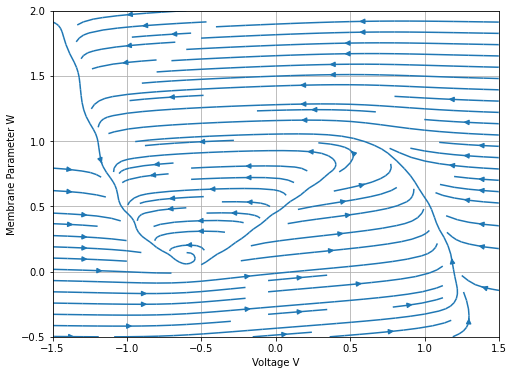

In [6]:
#we do have to pick an Iext
Iext=0.5;
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-1.5,1.5,25);
w=np.linspace(-0.5,2,25);

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M

ax4.streamplot(V1, W1, DV1, DW1)
#ax4.legend()
ax4.grid()
ax4.set_ylabel("Membrane Parameter W")
ax4.set_xlabel("Voltage V")

plt.xlim(-1.5,1.5)
plt.ylim(-0.5,2)

#need to label X and Y axis as V and W

Ok, so that's nice. So what is left to do is (1) find the null clines, (2) find the equilibrium points, and (3) classify the equilibrium points. Simple enough...

The null clines are the lines we get when we set the differential equations equal to 0. We don't have to write any code for that, we can just solve by hand to get:

$\frac{dv}{dt}=v - v^3 - w + I\implies w_1=v - v^3 + I$

$\frac{dw}{dt}=\frac{\tau}{c}(v + a - bw)\implies w_2= (v + a)/b $

So, we can plot these in phase space.

(-0.5, 2.0)

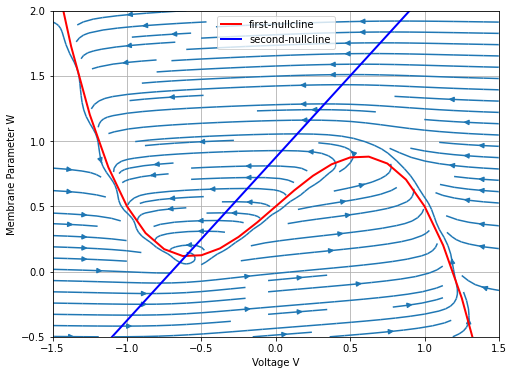

In [14]:
#for this, pick Iext
Iext=0.5;
t=np.arange(0.0, 450.0, 0.01)

fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-1.5,1.5,25);
w=np.linspace(-0.5,2,25);

def w1(v,Iext):
    return (v - v**3 + Iext)

def w2(v,Iext):
    return (v + a)/b

ax4.plot(v,w1(v,Iext),'r-', lw=2, label='first-nullcline')
ax4.plot(v,w2(v,Iext),'b-', lw=2, label='second-nullcline')


#ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline') fill these in with the actual nullclines, found by hand???
#ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M

ax4.streamplot(V1, W1, DV1, DW1)
ax4.legend()
ax4.grid()
ax4.set_ylabel("Membrane Parameter W")
ax4.set_xlabel("Voltage V")
plt.xlim(-1.5,1.5)
plt.ylim(-0.5,2)

So that looks nice. The equilibrium points are going to be where the null clines intersect. With out given parameters, I am fairly sure that there will only ever be one equilibrium point, but in the code I will allow for multiple. To classify the equilibrium point, you must find the eigenvalues of the jacobian. The Jacobian is easy to find by hand, but the eigenvalues will require code.

Jacobian: 

For a given system of differential equations,

$$
\frac{\partial F(x,y)}{\partial X} =\left(
\begin{matrix}
\frac{\partial F_1 (x,y)}{\partial x} \\
\frac{\partial F_2 (x,y)}{\partial y}
\end{matrix} \right)
$$

the Jacobian associated with the system is:

$$
J=\left(
\begin{matrix}
\frac{\partial F_1(x,y)}{\partial x} & \frac{\partial F_1(x,y)}{\partial y} \\
\frac{\partial F_2(x,y)}{\partial x} & \frac{\partial F_2(x,y)}{\partial y}
\end{matrix}
\right)
$$

What the Jacobian shows is the 

In [6]:
import scipy as sp
import numpy as np
#import pylab as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


#so, we have to completely rewrite the code, and basically do what he told us to do at the beginning, DISCRETIZE!!!

def FHNneuron2(I,timespan,dt,point):
    #parameters
    #would be nice to explain what each param means
    a=0.7
    b=0.8
    c=3
    
    #these two params from scholarpedia, would like better justification
    R=1
    tauinv=0.08*3 #1/tau
    t=np.arange(0.0, timespan, dt)
    
    #lets add noise with some modulation by a constant 0<k<1;
    k1=0.1
    k2=0.1
    
    noise1=k1*np.random.normal(0,1,len(t))
    noise2=k2*np.random.normal(0,1,len(t))
    
    v=np.zeros(len(t))
    w=np.zeros(len(t))
    
    v[0]=point[0]
    w[0]=point[1]
    
    for i in range (len(t)-1):
        v[i+1]=v[i]+dt*(v[i]-v[i]**3 -w[i] + R*I + noise1[i])
        w[i+1]=w[i]+dt*((tauinv/c)*(v[i] + a - b*w[i])+noise2[i])
    
    return v,w

In [7]:
def find_roots(I): #This gives the equilibrium points, given I
    a=0.7
    b=0.8
    coeff=[1, 0, 1/b - 1, a/b - I]
    #Only keep real roots:
    roots = [np.real(r) for r in np.roots(coeff) if np.isreal(r)]
    # We store the position of the equilibrium. 
    return [[r, r - r**3 + I] for r in roots]

def jacobian(point, I): #find jacobian by hand, put equilibrium points into here
    a=0.7
    b=0.8
    c=3
    tau=1/(0.08*3) #1/tau
    v=point[0]
    w=point[1]
    return np.array([[- 3 * v**2 + 1 , -1],
                       [1/tau, -b/(c*tau)]])

def stability(jacobian): #Put jacobian into here and it says what kind of point it is as a string
    eigv = np.linalg.eigvals(jacobian)
    
    if all(np.real(eigv)==0) and all(np.imag(eigv)!=0):
        nature = "Center" 
    elif np.real(eigv)[0]*np.real(eigv)[1]<0:
        nature = "Saddle"
    else: 
        stability = 'Unstable' if all(np.real(eigv)>0) else 'Stable'
        nature = stability + (' focus' if all(np.imag(eigv)!=0) else ' node')
    return nature

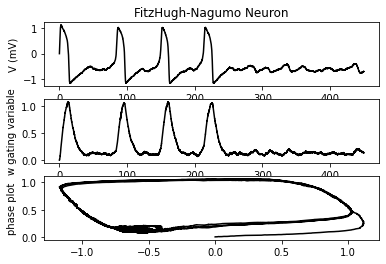

In [8]:
I=0.5;
t=np.arange(0,450,0.01)
neuron1=FHNneuron2(I,450,0.01,[0,0]);
v=neuron1[0];
w=neuron1[1];

plt.figure()

plt.subplot(3,1,1)
plt.title('FitzHugh-Nagumo Neuron')
plt.plot(t, v, 'k')
plt.ylabel('V (mV)')

plt.subplot(3,1,2)
plt.plot(t, w, 'k')
plt.ylabel('w gating variable')

plt.subplot(3,1,3)
plt.plot(v, w, 'k')
plt.ylabel('phase plot')

plt.show()    
    
    
    
    

Text(0, 0.5, 'V (mV)')

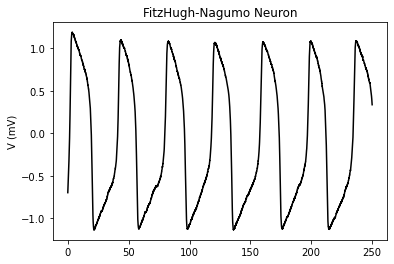

In [9]:
I=0.75;
tstop=250;
dt=0.01;
t=np.arange(0,tstop,dt);
neuron1=FHNneuron2(I,tstop,dt,[-0.7,0]);
v=neuron1[0];
w=neuron1[1];

plt.figure()
plt.title('FitzHugh-Nagumo Neuron')
plt.plot(t, v, 'k')
plt.ylabel('Voltage (mV)')

(-0.5, 2.0)

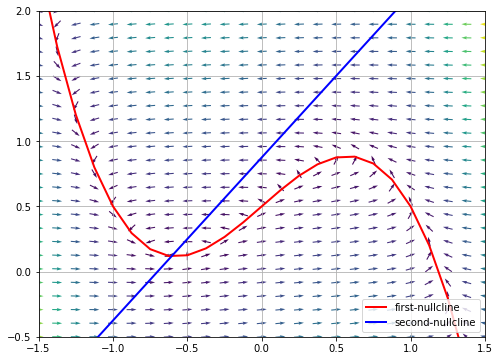

In [10]:
def Syst(X,Iext): #without time
    a=0.7
    b=0.8
    c=3
    
    #these two params from scholarpedia, would like better justification
    R=1
    tauinv=0.08 #1/tau
    """
    Integrate

    |  :param X:
    |  :param t:
    |  :return: calculate membrane potential & activation variables
    """
        
    v, w = X
        
    dvdt = v - v**3 - w + R*Iext
    dwdt = (tauinv)*(v + a - b*w)
        
    return dvdt, dwdt
a=0.7;
b=0.8;
c=3;
    
#these two params from scholarpedia, would like better justification
R=1;
tauinv=0.08*3; #1/tau


#for this, pick Iext
Iext=0.5;

fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-1.5,1.5,25);
w=np.linspace(-0.5,2,25);

def w1(v,Iext):
    return (v - v**3 + Iext)

def w2(v,Iext):
    return (v + a)/b

ax4.plot(v,w1(v,Iext),'r-', lw=2, label='first-nullcline')
ax4.plot(v,w2(v,Iext),'b-', lw=2, label='second-nullcline')

#ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline') fill these in with the actual nullclines, found by hand???
#ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M

ax4.quiver(V1, W1, DV1, DW1, M, pivot='mid')
ax4.legend()
ax4.grid()
plt.xlim(-1.5,1.5)
plt.ylim(-0.5,2)

(-0.5, 2.0)

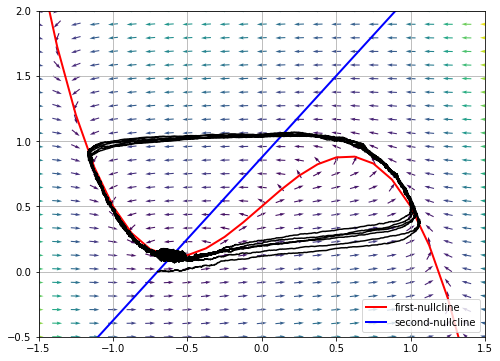

In [11]:
#for this, pick Iext
Iext=0.5;
ts=450
dt=0.01

fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-1.5,1.5,25);
w=np.linspace(-0.5,2,25);

def w1(v,Iext):
    return (v - v**3 + Iext)

def w2(v,Iext):
    return (v + a)/b

ax4.plot(v,w1(v,Iext),'r-', lw=2, label='first-nullcline')
ax4.plot(v,w2(v,Iext),'b-', lw=2, label='second-nullcline')

neuron=FHNneuron2(Iext,ts,dt,[-0.7,0]);
va=neuron[0];
wa=neuron[1];
ax4.plot(va,wa,'k-')

#ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline') fill these in with the actual nullclines, found by hand???
#ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M

ax4.quiver(V1, W1, DV1, DW1, M, pivot='mid')
ax4.legend()
ax4.grid()
plt.xlim(-1.5,1.5)
plt.ylim(-0.5,2)

Stable focus
[-0.6067058313811147, 0.1166177107736065]


(-0.5, 2.0)

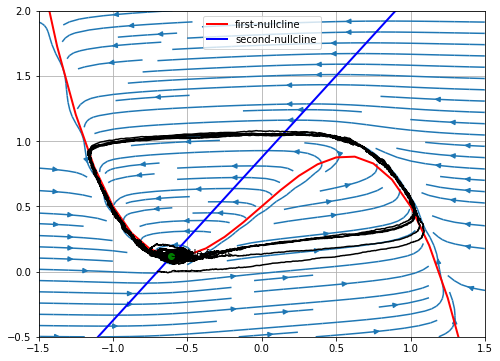

In [12]:
#for this, pick Iext
Iext=0.5;
t=np.arange(0.0, 450.0, 0.01)

fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-1.5,1.5,25);
w=np.linspace(-0.5,2,25);

#k1=0.1;
#k2=0.1;

#noise1=k1*np.random.normal(0,1,len(t))
#noise2=k2*np.random.normal(0,1,len(t))
    


def w1(v,Iext):
    return (v - v**3 + Iext)

def w2(v,Iext):
    return (v + a)/b

ax4.plot(v,w1(v,Iext),'r-', lw=2, label='first-nullcline')
ax4.plot(v,w2(v,Iext),'b-', lw=2, label='second-nullcline')

tstop=450;
dt=0.01

neuron=FHNneuron2(Iext,tstop,dt,[-0.7,0]);
va=neuron[0];
wa=neuron[1];
ax4.plot(va,wa,'k-')

#ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline') fill these in with the actual nullclines, found by hand???
#ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M



ax4.streamplot(V1, W1, DV1, DW1)
ax4.legend()
ax4.grid()

roots=find_roots(Iext);
for root in roots:

    label=stability(jacobian(root,Iext))
    print(label)
    print(root)
    plt.plot(root[0],root[1],"go")
    plt.annotate(label,root)


plt.xlim(-1.5,1.5)
plt.ylim(-0.5,2)

Unstable focus
[-0.3411639019140094, 0.4485451226074881]


(-0.5, 2.0)

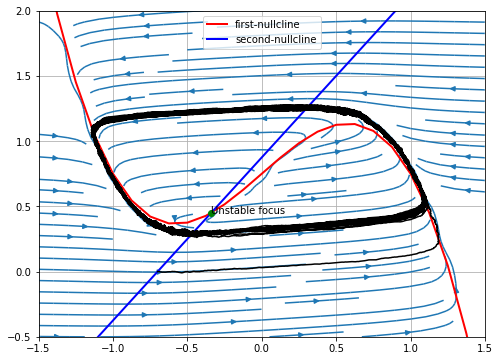

In [13]:
#for this, pick Iext
Iext=0.75;
t=np.arange(0.0, 450.0, 0.01)

fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-1.5,1.5,25);
w=np.linspace(-0.5,2,25);

#k1=0.1;
#k2=0.1;

#noise1=k1*np.random.normal(0,1,len(t))
#noise2=k2*np.random.normal(0,1,len(t))
    


def w1(v,Iext):
    return (v - v**3 + Iext)

def w2(v,Iext):
    return (v + a)/b

ax4.plot(v,w1(v,Iext),'r-', lw=2, label='first-nullcline')
ax4.plot(v,w2(v,Iext),'b-', lw=2, label='second-nullcline')

tstop=450;
dt=0.01

neuron=FHNneuron2(Iext,tstop,dt,[-0.7,0]);
va=neuron[0];
wa=neuron[1];
ax4.plot(va,wa,'k-')

#ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline') fill these in with the actual nullclines, found by hand???
#ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M



ax4.streamplot(V1, W1, DV1, DW1)
ax4.legend()
ax4.grid()

roots=find_roots(Iext);
for root in roots:

    label=stability(jacobian(root,Iext))
    print(label)
    print(root)
    plt.plot(root[0],root[1],"go")
    plt.annotate(label,root)


plt.xlim(-1.5,1.5)
plt.ylim(-0.5,2)